In [1]:
import h5py
import os
import pandas as pd
import keras
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import Word
#nltk.download("stopwords")

In [2]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [86]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [87]:
!ls "/content/drive/My Drive/DB/Review/review"

review1.csv  review3.csv  review5.csv  review7.csv
review2.csv  review4.csv  review6.csv


In [88]:
l = os.listdir('/content/drive/My Drive/DB/Review/review')
print(l)

['review1.csv', 'review2.csv', 'review3.csv', 'review4.csv', 'review5.csv', 'review6.csv', 'review7.csv', '.DS_Store']


In [65]:
#Processing Review1 and Review2 files individually 
dir = '/content/drive/My Drive/DB/Review/review/'+'review1.csv'
df = pd.read_csv(dir, sep=',')
df.drop(columns='Unnamed: 0', axis=1, inplace=True)
df.dropna(inplace=True)
df.info()
df.head()        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1000000 non-null  object
 1   stars   1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 22.9+ MB


,text,stars
0,Apparently Prides Osteria had a rough summer a...,4
1,This store is pretty good. Not as great as Wal...,4
2,I called WVM on the recommendation of a couple...,5
3,I've stayed at many Marriott and Renaissance M...,2
4,The food is always great here. The service fro...,4


In [66]:
df['text1'] = df['text']
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1000000 non-null  object
 1   stars   1000000 non-null  int64 
 2   text1   1000000 non-null  object
dtypes: int64(1), object(2)
memory usage: 30.5+ MB


,text,stars,text1
0,Apparently Prides Osteria had a rough summer a...,4,Apparently Prides Osteria had a rough summer a...
1,This store is pretty good. Not as great as Wal...,4,This store is pretty good. Not as great as Wal...
2,I called WVM on the recommendation of a couple...,5,I called WVM on the recommendation of a couple...
3,I've stayed at many Marriott and Renaissance M...,2,I've stayed at many Marriott and Renaissance M...
4,The food is always great here. The service fro...,4,The food is always great here. The service fro...


In [67]:
#1. Lowercase all reviews
df['text1'] = df['text1'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1000000 non-null  object
 1   stars   1000000 non-null  int64 
 2   text1   1000000 non-null  object
dtypes: int64(1), object(2)
memory usage: 30.5+ MB


,text,stars,text1
0,Apparently Prides Osteria had a rough summer a...,4,apparently prides osteria had a rough summer a...
1,This store is pretty good. Not as great as Wal...,4,this store is pretty good. not as great as wal...
2,I called WVM on the recommendation of a couple...,5,i called wvm on the recommendation of a couple...
3,I've stayed at many Marriott and Renaissance M...,2,i've stayed at many marriott and renaissance m...
4,The food is always great here. The service fro...,4,the food is always great here. the service fro...


In [68]:
#2. remove punctuation
import re
df['text1'] = df['text1'].apply(lambda x: re.sub(r'[^\w\s]','',x)) #words or white spaces
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1000000 non-null  object
 1   stars   1000000 non-null  int64 
 2   text1   1000000 non-null  object
dtypes: int64(1), object(2)
memory usage: 30.5+ MB


,text,stars,text1
0,Apparently Prides Osteria had a rough summer a...,4,apparently prides osteria had a rough summer a...
1,This store is pretty good. Not as great as Wal...,4,this store is pretty good not as great as walm...
2,I called WVM on the recommendation of a couple...,5,i called wvm on the recommendation of a couple...
3,I've stayed at many Marriott and Renaissance M...,2,ive stayed at many marriott and renaissance ma...
4,The food is always great here. The service fro...,4,the food is always great here the service from...


In [69]:
#Text Length before removing stop words
df['text1_length'] = df['text1'].apply(lambda x : len(x))
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   text          1000000 non-null  object
 1   stars         1000000 non-null  int64 
 2   text1         1000000 non-null  object
 3   text1_length  1000000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 38.1+ MB


,text,stars,text1,text1_length
0,Apparently Prides Osteria had a rough summer a...,4,apparently prides osteria had a rough summer a...,1825
1,This store is pretty good. Not as great as Wal...,4,this store is pretty good not as great as walm...,670
2,I called WVM on the recommendation of a couple...,5,i called wvm on the recommendation of a couple...,560
3,I've stayed at many Marriott and Renaissance M...,2,ive stayed at many marriott and renaissance ma...,373
4,The food is always great here. The service fro...,4,the food is always great here the service from...,175


In [70]:
df['text1_length'].mean()

580.740697

In [71]:
#3. remove stopwords
stop = stopwords.words('english')
print("Number of stop words : ",len(stop))
print("stop words : ",stop)

n_stopwords = ['against','not', "don't", "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
stop_new = [i for i in stop if i not in n_stopwords]
print("Number of new stop words : ",len(stop_new))
print("New stop words : ",stop_new)

Number of stop words :  179
stop words :  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'no

In [72]:
df['text1'] = df['text1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_new))
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   text          1000000 non-null  object
 1   stars         1000000 non-null  int64 
 2   text1         1000000 non-null  object
 3   text1_length  1000000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 38.1+ MB


,text,stars,text1,text1_length
0,Apparently Prides Osteria had a rough summer a...,4,apparently prides osteria rough summer evidenc...,1825
1,This store is pretty good. Not as great as Wal...,4,store pretty good not great walmart preferred ...,670
2,I called WVM on the recommendation of a couple...,5,called wvm recommendation couple friends used ...,560
3,I've stayed at many Marriott and Renaissance M...,2,ive stayed many marriott renaissance marriotts...,373
4,The food is always great here. The service fro...,4,food always great service manager well staff s...,175


In [73]:
#Text Length after removing stop words
df['text1_length'] = df['text1'].apply(lambda x : len(x))
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   text          1000000 non-null  object
 1   stars         1000000 non-null  int64 
 2   text1         1000000 non-null  object
 3   text1_length  1000000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 38.1+ MB


,text,stars,text1,text1_length
0,Apparently Prides Osteria had a rough summer a...,4,apparently prides osteria rough summer evidenc...,1254
1,This store is pretty good. Not as great as Wal...,4,store pretty good not great walmart preferred ...,460
2,I called WVM on the recommendation of a couple...,5,called wvm recommendation couple friends used ...,357
3,I've stayed at many Marriott and Renaissance M...,2,ive stayed many marriott renaissance marriotts...,234
4,The food is always great here. The service fro...,4,food always great service manager well staff s...,99


In [74]:
df['text1_length'].mean()

380.486104

In [75]:
#4. Lemmatization
#lm= WordNetLemmatizer()  
#nltk.download('wordnet')
#df['text1'] = df['text1'].apply(lambda x: " ".join([lm.lemmatize(word) for word in x.split()]))
import pattern
from pattern.en import lemma, lexeme
from pattern.en import parse

df['text1'] = df['text1'].apply(lambda x: " ".join([lemma(word) for word in x.split()]))
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   text          1000000 non-null  object
 1   stars         1000000 non-null  int64 
 2   text1         1000000 non-null  object
 3   text1_length  1000000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 38.1+ MB


,text,stars,text1,text1_length
0,Apparently Prides Osteria had a rough summer a...,4,apparently pride osteria rough summer evidence...,1254
1,This store is pretty good. Not as great as Wal...,4,store pretty good not great walmart prefer mil...,460
2,I called WVM on the recommendation of a couple...,5,call wvm recommendation couple friend used pas...,357
3,I've stayed at many Marriott and Renaissance M...,2,ive stay many marriott renaissance marriott hu...,234
4,The food is always great here. The service fro...,4,food alway great service manager well staff su...,99


In [94]:
#A sentence before preprocessing
df['text'][4]

"The food is always great here. The service from both the manager as well as the staff is super. Only draw back of this restaurant is it's super loud. If you can, snag a patio table!"

In [96]:
#A sentence after preprocessing(lower case conversion, punctuations removal, stop words removal, lemmatization)
df['text1'][4]

'food alway great service manager well staff super draw back restaurant super loud snag patio table'

In [78]:
#Adding quotations for text1 for proper reading of the dataframe in pySpark
df['text2'] = '"'+df['text1']+'"'
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   text          1000000 non-null  object
 1   stars         1000000 non-null  int64 
 2   text1         1000000 non-null  object
 3   text1_length  1000000 non-null  int64 
 4   text2         1000000 non-null  object
dtypes: int64(2), object(3)
memory usage: 45.8+ MB


,text,stars,text1,text1_length,text2
0,Apparently Prides Osteria had a rough summer a...,4,apparently pride osteria rough summer evidence...,1254,"""apparently pride osteria rough summer evidenc..."
1,This store is pretty good. Not as great as Wal...,4,store pretty good not great walmart prefer mil...,460,"""store pretty good not great walmart prefer mi..."
2,I called WVM on the recommendation of a couple...,5,call wvm recommendation couple friend used pas...,357,"""call wvm recommendation couple friend used pa..."
3,I've stayed at many Marriott and Renaissance M...,2,ive stay many marriott renaissance marriott hu...,234,"""ive stay many marriott renaissance marriott h..."
4,The food is always great here. The service fro...,4,food alway great service manager well staff su...,99,"""food alway great service manager well staff s..."


In [79]:
df_final = df.loc[:,['text1','text2','stars']]
df_final.rename(columns={'text1':'basemodel_text', 'text2':'primarymodel_text'}, inplace=True)
df_final.info()
df_final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   basemodel_text     1000000 non-null  object
 1   primarymodel_text  1000000 non-null  object
 2   stars              1000000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 30.5+ MB


,basemodel_text,primarymodel_text,stars
0,apparently pride osteria rough summer evidence...,"""apparently pride osteria rough summer evidenc...",4
1,store pretty good not great walmart prefer mil...,"""store pretty good not great walmart prefer mi...",4
2,call wvm recommendation couple friend used pas...,"""call wvm recommendation couple friend used pa...",5
3,ive stay many marriott renaissance marriott hu...,"""ive stay many marriott renaissance marriott h...",2
4,food alway great service manager well staff su...,"""food alway great service manager well staff s...",4


In [80]:
#Understanding stars/ratings
df_final['stars'].describe()

count    1000000.000000
mean           3.731814
std            1.450113
min            1.000000
25%            3.000000
50%            4.000000
75%            5.000000
max            5.000000
Name: stars, dtype: float64

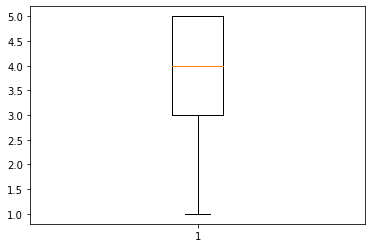

In [81]:
plt.boxplot(df_final['stars'])
plt.show()

In [82]:
#Adding labels - stars/rating is the parameter based on wich we are giving labels(1 for  positive review and 0 for negative review)
#The stars values are left skewed having a mean of 3.73 and median of 4 - inorder to decrease class imabalance we are taking the partition value as 3.5 instead of 3
#That is the reviews having stars/rating > 3.5 are labeled as positive reviews and the reviews having the stars/rating <=3.5 are labeled as negative reviews
df_final['label'] = df_final['stars'].apply(lambda x: 1 if x>3.5 else 0)
df_final.drop(columns='stars', inplace=True, axis=1)
df_final.info()
df_final.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   basemodel_text     1000000 non-null  object
 1   primarymodel_text  1000000 non-null  object
 2   label              1000000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 30.5+ MB


,basemodel_text,primarymodel_text,label
0,apparently pride osteria rough summer evidence...,"""apparently pride osteria rough summer evidenc...",1
1,store pretty good not great walmart prefer mil...,"""store pretty good not great walmart prefer mi...",1
2,call wvm recommendation couple friend used pas...,"""call wvm recommendation couple friend used pa...",1
3,ive stay many marriott renaissance marriott hu...,"""ive stay many marriott renaissance marriott h...",0
4,food alway great service manager well staff su...,"""food alway great service manager well staff s...",1


In [83]:
dir = '/content/drive/My Drive/DB/Review/reviews_processed_final/'+'review1.csv'
df_final.to_csv(dir,sep=",",index=False)